In [7]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [8]:
df_cal = pd.read_excel('data/Canada.xlsx',sheet_name='Canada by Citizenship',skiprows=20)

In [9]:
df_cal.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [10]:
df_cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      197 non-null    object
 1   Coverage  197 non-null    object
 2   OdName    197 non-null    object
 3   AREA      197 non-null    int64 
 4   AreaName  197 non-null    object
 5   REG       197 non-null    int64 
 6   RegName   197 non-null    object
 7   DEV       197 non-null    int64 
 8   DevName   197 non-null    object
 9   1980      197 non-null    int64 
 10  1981      197 non-null    int64 
 11  1982      197 non-null    int64 
 12  1983      197 non-null    int64 
 13  1984      197 non-null    int64 
 14  1985      197 non-null    int64 
 15  1986      197 non-null    int64 
 16  1987      197 non-null    int64 
 17  1988      197 non-null    int64 
 18  1989      197 non-null    int64 
 19  1990      197 non-null    int64 
 20  1991      197 non-null    int64 
 21  1992      197 no

In [11]:
df_cal.drop(['AREA','REG','DEV','Type','Coverage'],axis=1,inplace=True)

In [12]:
df_cal.rename(columns={'OdName':'Country','AreaName':'Continent','RegName':'Region'},inplace=True)

In [13]:
df_cal.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [14]:
df_cal.columns=list(map(str,df_cal.columns))

In [15]:
df_cal.set_index('Country',inplace=True)

In [16]:
df_cal.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


In [17]:
df_cal['Total'] = df_cal.sum(axis=1)

In [18]:
df_cal.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


## waffel chart

In [19]:
import matplotlib as mpl 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches #waffle

In [20]:
df_dsn = df_cal.loc[['Denmark','Norway','Sweden']]
df_dsn

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


In [22]:
# step 1
total_values = sum(df_dsn['Total'])
category_proportions = [float(value) / total_values for value in df_dsn['Total']]

for i, proportion in enumerate(category_proportions):
    print(df_dsn.index.values[i]+' : ' + str(proportion))

Denmark : 0.32255663965602777
Norway : 0.1924094592359848
Sweden : 0.48503390110798744


In [23]:
#step 2
width = 40
height = 10

total_num_tiles = width * height

In [24]:
# step 3
tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions ]

for i, tiles in enumerate(tiles_per_category):
    print(df_dsn.index.values[i]+':'+str(tiles))

Denmark:129
Norway:77
Sweden:194


In [25]:
# step 4
waffle_chart = np.zeros((width,height))

Word Cloud

In [26]:
! pip install wordcloud

In [3]:
from wordcloud import WordCloud, STOPWORDS

In [4]:
STOPWORDS

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [27]:
df_cal['Continent'].values

array(['Asia', 'Europe', 'Africa', 'Oceania', 'Europe', 'Africa',
       'Latin America and the Caribbean',
       'Latin America and the Caribbean', 'Asia', 'Oceania', 'Europe',
       'Asia', 'Latin America and the Caribbean', 'Asia', 'Asia',
       'Latin America and the Caribbean', 'Europe', 'Europe',
       'Latin America and the Caribbean', 'Africa', 'Asia',
       'Latin America and the Caribbean', 'Europe', 'Africa',
       'Latin America and the Caribbean', 'Asia', 'Europe', 'Africa',
       'Africa', 'Africa', 'Asia', 'Africa', 'Northern America', 'Africa',
       'Africa', 'Latin America and the Caribbean', 'Asia', 'Asia',
       'Asia', 'Latin America and the Caribbean', 'Africa', 'Africa',
       'Latin America and the Caribbean', 'Africa', 'Europe',
       'Latin America and the Caribbean', 'Asia', 'Europe', 'Asia',
       'Africa', 'Europe', 'Africa', 'Latin America and the Caribbean',
       'Latin America and the Caribbean',
       'Latin America and the Caribbean', 'A

In [28]:
corpus = df_cal['Continent'].values

In [29]:
corpus = ' '.join(corpus)

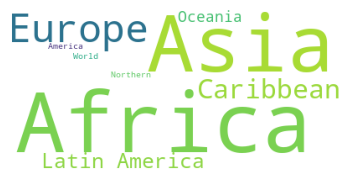

In [30]:
wc = WordCloud(background_color='white',max_words=20000, stopwords=STOPWORDS)
wc.generate(corpus)

plt.imshow(wc);
plt.axis('off');

### Regresion Plot

In [31]:
import seaborn as sns

In [39]:
years = list(map(str, range(1980,2014)))
df_tot = pd.DataFrame(df_cal[years].sum())

In [40]:
df_tot.reset_index(inplace=True)
df_tot.columns = ['year','total']
df_tot.head()

,year,total
0,1980,286274
1,1981,257282
2,1982,242350
3,1983,178370
4,1984,176544


In [41]:
df_tot.year = df_tot.year.astype(float)

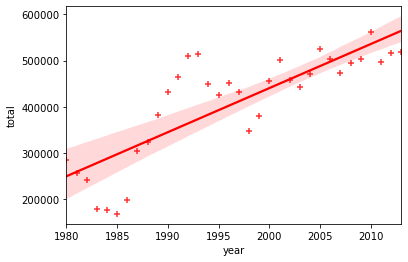

In [44]:
ax = sns.regplot(x='year',y='total',data=df_tot, color='red', marker='+')

[Text(0, 0.5, 'Total Imigrasi'), Text(0.5, 0, 'Tahun')]

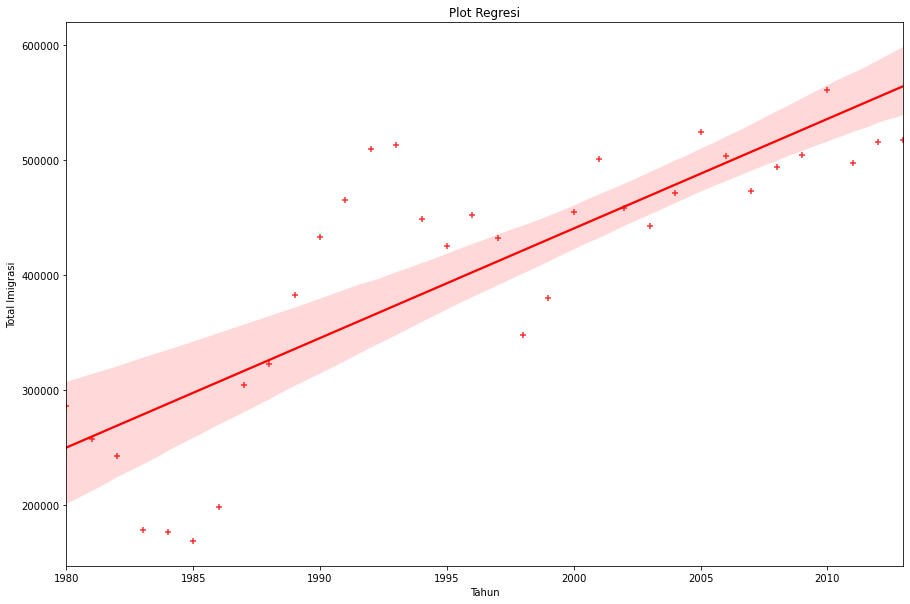

In [46]:
plt.figure(figsize=(15,10))
ax = sns.regplot(x='year',y='total',data=df_tot, color='red', marker='+')
ax.set_title("Plot Regresi") 
ax.set(xlabel='Tahun',ylabel='Total Imigrasi')